In [1]:
import quake_envs
import matplotlib.pyplot as plt
import seaborn as sns
from quake_envs.simulations.building_funcs import Building, BuildingAction
from quake_envs.simulations.road_funcs import Road, RoadAction
import numpy as np
from shapely.geometry import Polygon, LineString
import matplotlib.patches as patches
import gymnasium as gym

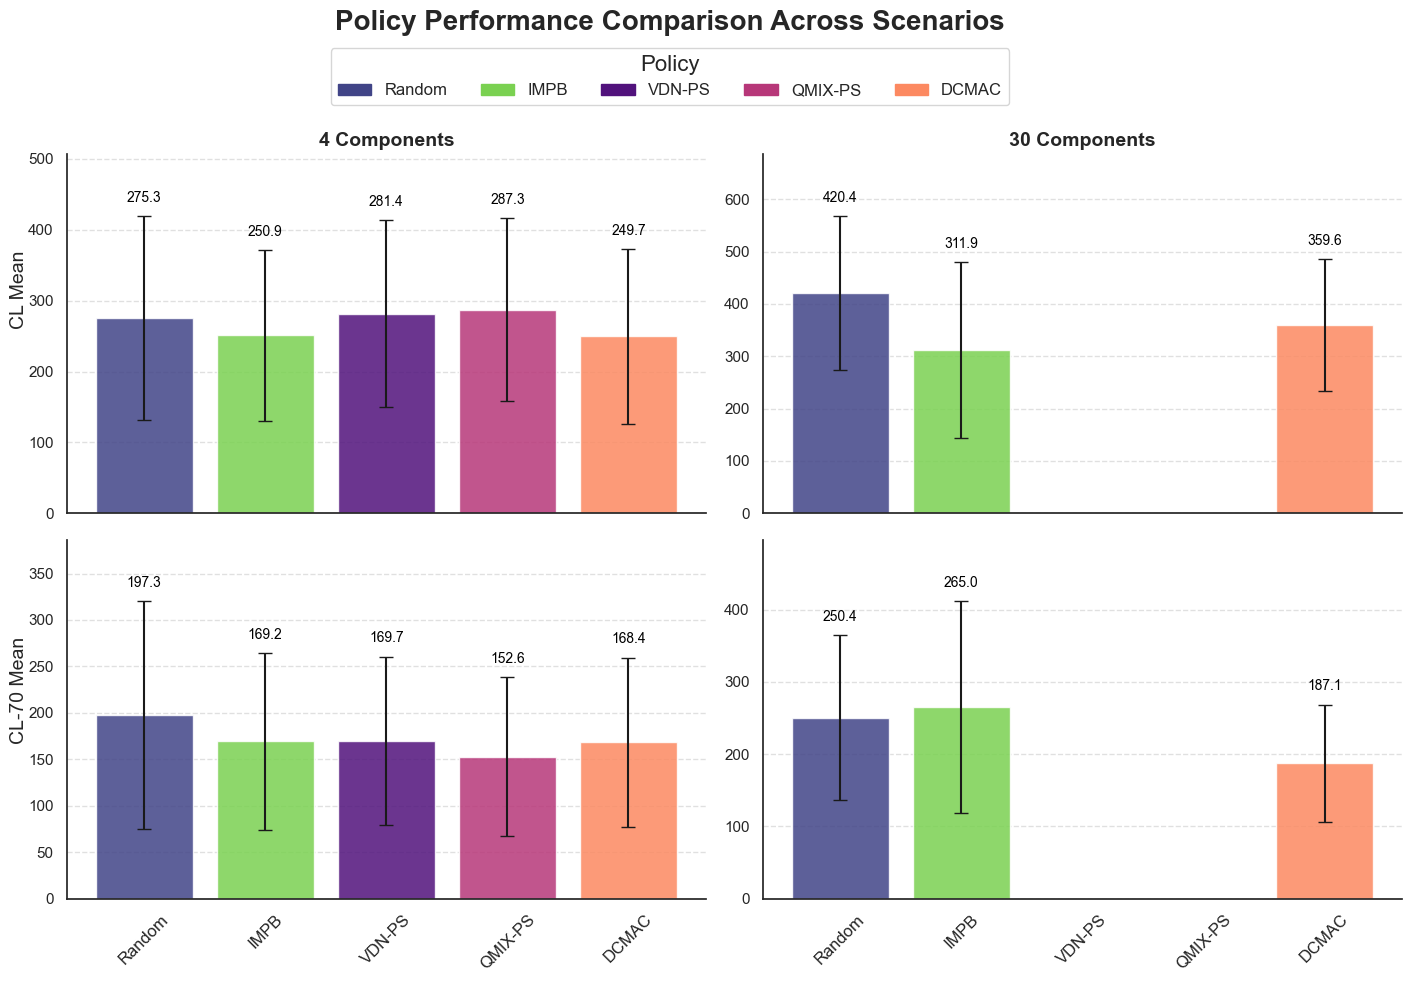

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# --- 1. Data and Style Setup ---

# Create the data
data = {
    'Policy': ['Random', 'IMPB', 'VDN-PS', 'QMIX-PS', 'DCMAC',
               'Random', 'IMPB', 'DCMAC'],
    'Components': [4, 4, 4, 4, 4, 30, 30, 30],
    'CL_Mean': [275.34, 250.91, 281.41, 287.33, 249.65,
                420.42, 311.93, 359.6],
    'CL-70_Mean': [197.3, 169.2, 169.7, 152.56, 168.45,
                   250.44, 264.99, 187.12],
    'CL_Sigma': [144.18, 120.11, 132.12, 129.28, 123.75,
                 147.42, 167.76, 126.22],
    'CL-70_Sigma': [122.72, 94.98, 90.84, 85.49, 91.05,
                    113.95, 146.63, 81.5]
}
df = pd.DataFrame(data)

# Set a clean and professional style
sns.set_style("white")
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['font.family'] = 'sans-serif'

# Define the custom color palette from your previous request
viridis = plt.get_cmap('viridis')
magma = plt.get_cmap('magma')
policy_colors = {
    'Random': viridis(0.2), 'IMPB': viridis(0.8),
    'VDN-PS': magma(0.25), 'QMIX-PS': magma(0.5), 'DCMAC': magma(0.75)
}

# Separate data for plotting
df_4 = df[df['Components'] == 4]
df_30 = df[df['Components'] == 30]

# --- 2. Create the Plot ---

# Use subplots with shared axes for a cleaner look
fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)
fig.suptitle('Policy Performance Comparison Across Environments', fontsize=20, fontweight='bold')

# --- Helper function for plotting to avoid repeating code ---
def plot_bars(ax, data, y_metric, y_error, title):
    """Plots bars, error bars, and data labels on a given axis."""
    colors = [policy_colors[p] for p in data['Policy']]
    bars = ax.bar(data['Policy'], data[y_metric], yerr=data[y_error],
                  color=colors, capsize=5, alpha=0.85)

    # Add data labels on top of each bar
    ax.bar_label(bars, fmt='%.1f', padding=8, fontsize=10, color='black')

    # Professional formatting
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=11)
    # Set y-limit to give space for labels
    ax.set_ylim(0, ax.get_ylim()[1] * 1.15)

# --- Plotting on each subplot ---
plot_bars(axes[0, 0], df_4, 'CL_Mean', 'CL_Sigma', '4 Components')
plot_bars(axes[0, 1], df_30, 'CL_Mean', 'CL_Sigma', '30 Components')
plot_bars(axes[1, 0], df_4, 'CL-70_Mean', 'CL-70_Sigma', '') # No title for bottom row
plot_bars(axes[1, 1], df_30, 'CL-70_Mean', 'CL-70_Sigma', '')

# --- 3. Final Touches ---

# Set shared axis labels to reduce redundancy
fig.text(0.06, 0.7, 'CL Mean', va='center', rotation='vertical', fontsize=14)
fig.text(0.06, 0.3, 'CL-70 Mean', va='center', rotation='vertical', fontsize=14)

# Rotate bottom x-tick labels
for ax in axes[1]:
    ax.tick_params(axis='x', rotation=45)

# Remove top and right borders (spines) for a cleaner look
sns.despine(fig)

# Create a centralized legend
legend_patches = [mpatches.Patch(color=color, label=label) for label, color in policy_colors.items()]
fig.legend(handles=legend_patches,
           loc='upper center',
           bbox_to_anchor=(0.5, 0.95),
           ncol=len(policy_colors),
           fontsize=12,
           title="Policy",
           title_fontsize=16)

# Adjust layout to prevent labels from overlapping
plt.tight_layout(rect=[0.06, 0, 1, 0.92]) # rect=[left, bottom, right, top]
plt.show()

In [2]:
env = gym.make("quake-res-30-v1").unwrapped

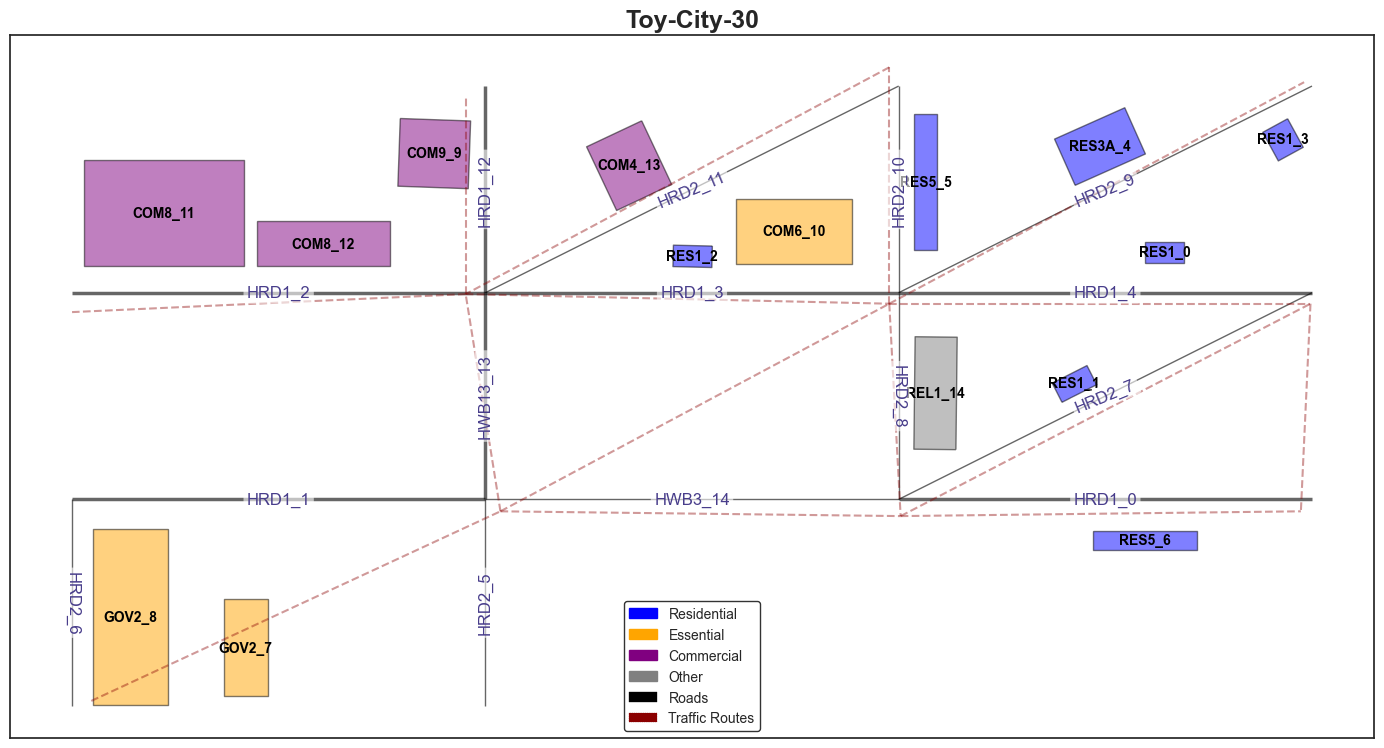

In [3]:
env.resilience.simulation.viz_environment(plot_name="Toy-City-30", show_road_ids=True, show_traffic_ids=False)

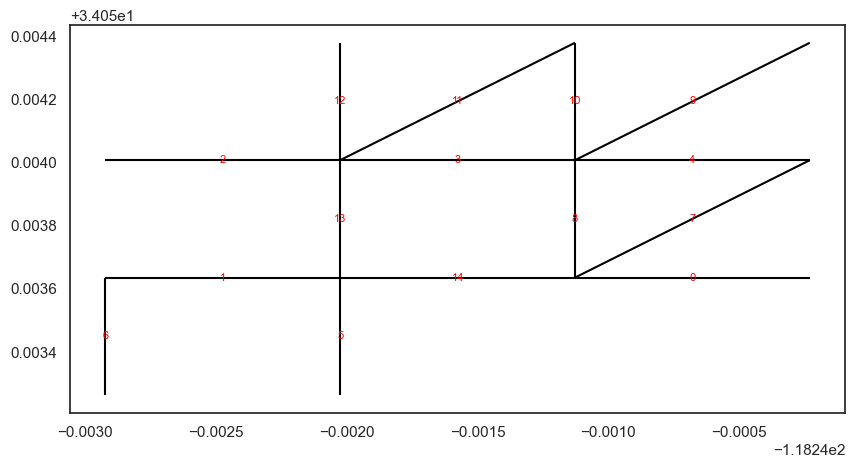

In [19]:
buildings = env.resilience.buildings_gdf
roads = env.resilience.roads_gdf
ax = roads.plot(edgecolor='black', figsize=(10, 10))

# Plot the index at the centroid of each polygon
for idx, row in roads.iterrows():
    centroid = row.geometry.centroid
    plt.text(centroid.x, centroid.y, str(idx), fontsize=8, ha='center', va='center', color='red')

plt.show()

In [20]:
buildings = env.resilience.buildings_objs
building = buildings[6]
building

In [21]:
building = Building(
  geometry=Polygon([(0, 0), (0, 10), (10, 10), (10, 0)]),
  id="test_building",
  occtype="COM2",
  str_type="S5L",
  num_stories=2,
  sqft=1000,
  is_essential=False,
  verbose=False,
  calc_debris=True,
  stoch_ds=True,
  stoch_rt=True,
  stoch_cost=True,
  stoch_inc_loss=True,
  stoch_loss_of_function=True,
  stoch_relocation_cost=True
)

road = Road(
  geometry=LineString([(0, 0), (0, 10), (10, 10), (10, 0)]),
  id="test_road",
  hazus_road_class="HRD1",
  verbose=False,
  calc_debris=True,
  stoch_ds=True,
  stoch_rt=True,
  stoch_cost=True,
  init_node=0,
  term_node=1,
  flow=1.0,
  capacity=1000,
  length_miles=1.0,
  hazus_bridge_class="None",
  is_bridge=False,
  time_step_duration=5,
  traffic_idx = 0
)

In [22]:
def repair_building(building:Building):
    repair_times = []
    incomes = []
    relocation_cost = []
    repair_cost = []
    actions= []

    while building.has_debris:
        action = np.random.choice(
            [BuildingAction.REPAIR, BuildingAction.DO_NOTHING],
            p=[0.5, 0.5]
        )
        repair_times.append(building.current_repair_time)
        incomes.append(building.current_income)
        relocation_cost.append(building.current_relocation_cost)
        repair_cost.append(building.current_structural_repair_cost)
        building.step(action)
        actions.append(action)
    while building.current_repair_time > 0:
        action = np.random.choice(
            [BuildingAction.REPAIR, BuildingAction.DO_NOTHING],
            p=[0.5, 0.5]
        )
        repair_times.append(building.current_repair_time)
        incomes.append(building.current_income)
        relocation_cost.append(building.current_relocation_cost)
        repair_cost.append(building.current_structural_repair_cost)
        building.step(action)
        actions.append(action)
        print(building.current_relocation_cost)
    while building.current_income != building.max_income:
        action = np.random.choice(
            [BuildingAction.REPAIR, BuildingAction.DO_NOTHING],
            p=[0.5, 0.5]
        )
        repair_times.append(building.current_repair_time)
        incomes.append(building.current_income)
        relocation_cost.append(building.current_relocation_cost)
        repair_cost.append(building.current_structural_repair_cost)
        building.step(action)
        actions.append(action)
    return repair_times, incomes, relocation_cost, repair_cost, actions


def repair_road(road: Road):
    repair_times = []
    capacity_reductions = []
    repair_costs = []
    actions = []

    while road.current_repair_time > 0:
        repair_times.append(road.current_repair_time)
        capacity_reductions.append(road.capacity_red_damage_state)
        repair_costs.append(road.current_repair_cost)
        actions.append(RoadAction.REPAIR)  # or RoadAction.DO_NOTHING if appropriate
        road.step(RoadAction.REPAIR, dependant_buildings=[])
    return repair_times, capacity_reductions, repair_costs, actions

In [23]:
# building.reset(damage_state_probs=np.array([0.0, 0.0, 0.0, 0.0, 1.0]), debris_capacity_reduction=1.0)
# road.reset(damage_state=4, capacity_red_debris=0.0)

In [24]:
def plot_single_road_repair(road, figsize=(10, 6)):
    """
    Plots repair metrics over time for a single road using the `repair_road` simulation.
    """
    repair_times, capacity_reductions, repair_costs, actions = repair_road(road)

    timesteps = list(range(len(repair_times)))

    def normalize_to_range(values, max_val=4, min_val=None):
        min_val = min_val if min_val is not None else min(values)
        max_range = max(values) if max(values) != min_val else min_val + 1
        return [max_val * (v - min_val) / (max_range - min_val) for v in values]

    rt_norm = normalize_to_range(repair_times)
    cr_norm = normalize_to_range(capacity_reductions)
    rcost_norm = normalize_to_range(repair_costs)

    sns.set(style="whitegrid", context="notebook")
    fig, ax = plt.subplots(figsize=figsize)

    # Shaded phase regions
    try:
        t_rep = -1
        for t in repair_times:
            if t == 0.0:
                t_rep = repair_times.index(t)
                break
        t_start_repair = next(i for i, t in enumerate(repair_times) if t < max(repair_times))
    except StopIteration:
        t_start_repair = 0

    ax.axvspan(xmin=timesteps[0], xmax=len(timesteps), color='red', alpha=0.1, label='Repair Phase')

    # ax.axvspan(xmin=t_start_repair-1, xmax=len(timesteps), color='orange', alpha=0.1, label='Repair Phase')

    # Plot metrics
    ax.plot(timesteps, rt_norm, label='Repair Time', linestyle='-', marker='o')
    ax.plot(timesteps, rcost_norm, label='Repair Cost', linestyle='--', marker='^')
    ax.plot(timesteps, cr_norm, label='Capacity Reduction', linestyle='-.', marker='s')

    # Decoration
    rect = patches.Rectangle((0, 4.75), timesteps[-1], 0.5, linewidth=1, edgecolor='black', facecolor='white', zorder=25)
    ax.add_patch(rect)

    for t in timesteps:
        if actions[t] == RoadAction.REPAIR:
            ax.scatter(t, 5, s=30, marker='>', color='purple', zorder=50)
        elif actions[t] == RoadAction.DO_NOTHING:
            ax.scatter(t, 5, s=30, marker='o', color='grey', zorder=50)

    ax.set_ylim(0, 5.5)
    ax.set_title(f"Road Repair Performance Over Time", fontsize=16)
    ax.set_xlabel("Timestep", fontsize=14)
    ax.set_ylabel("Normalized Metric Value", fontsize=14)
    ax.legend()
    plt.tight_layout()
    plt.show()


In [25]:

def plot_single_building_repair(building, figsize=(10, 6)):
    """
    Plots repair metrics over time for a single building using the `repair_building` simulation.
    """
    repair_times, incomes, relocation_costs, repair_costs, actions = repair_building(building)
    # print(incomes)
    # print(building.max_income)

    timesteps = list(range(len(repair_times)))

    def normalize_to_range(values, max_val=4, min_val=None):
        min_val = min_val if min_val is not None else min(values)
        max_range = max(values) if max(values) != min_val else min_val + 1
        return [max_val * (v - min_val) / (max_range - min_val) for v in values]

    # Normalize for plotting (keep relative shapes, scale to same range)
    rt_norm = normalize_to_range(repair_times)
    inc_norm = normalize_to_range(incomes, min_val=min(incomes))
    reloc_norm = normalize_to_range(relocation_costs)
    rcost_norm = normalize_to_range(repair_costs)

    sns.set(style="whitegrid", context="notebook")
    fig, ax = plt.subplots(figsize=figsize)

    # Shaded phase regions
    try:
        t_debris_end = next(i for i, t in enumerate(repair_times) if t < max(repair_times))
        t_rep = -1
        for t in repair_times:
            if t==0.0:
                t_rep = repair_times.index(t)
                break
    except StopIteration:
        t_debris_end = 0

    ax.axvspan(xmin=timesteps[0], xmax=t_debris_end-1, color='orange', alpha=0.1, label='Debris Clearing Phase')
    if t_rep != -1:
        ax.axvspan(xmin=t_debris_end-1, xmax=t_rep-1, color='red', alpha=0.1, label='Repair Phase')
        ax.axvspan(xmin=t_rep-1, xmax=len(timesteps)-1, color='green', alpha=0.1, label='Repair Phase')
    else:
        ax.axvspan(xmin=t_debris_end-1, xmax=len(timesteps), color='red', alpha=0.1, label='Repair Phase')

    # Plot metrics
    ax.plot(timesteps, rt_norm, label='Repair Time', linestyle='-', marker='o')
    ax.plot(timesteps, rcost_norm, label='Repair Cost', linestyle='--', marker='^')
    ax.plot(timesteps, inc_norm, label='Income', linestyle=':', marker='d')
    ax.plot(timesteps, reloc_norm, label='Relocation Cost', linestyle='-.', marker='x')

    # Decoration
    rect = patches.Rectangle((0, 4.75), timesteps[-1], 0.5, linewidth=1, edgecolor='black', facecolor='white', zorder=25)
    ax.add_patch(rect)

    for t in timesteps:
        if actions[t] == BuildingAction.REPAIR:
            ax.scatter(t, 5, s=30, marker='>', color='purple', zorder=50)
        elif actions[t] == BuildingAction.DO_NOTHING:
            ax.scatter(t, 5, s=30, marker='o', color='grey', zorder=50)


    ax.set_ylim(0, 5.5)
    ax.set_title(f"Building: {building.occtype} Repair Performance Over Time", fontsize=16)
    ax.set_xlabel("Timestep", fontsize=14)
    ax.set_ylabel("Normalized Metric Value", fontsize=14)
    ax.legend()
    plt.tight_layout()
    plt.show()

In [26]:
plot_single_building_repair(building)

# plot_single_road_repair(road)

AttributeError: 'Building' object has no attribute 'has_debris'